# In this project, the binary classifier marks a quote as either sarcastic or non-sarcastic, based on the text of the quote.

### Import the libraries and preprocess the data

In [1]:
import numpy as np
import json
import tensorflow as tf
from tensorflow import keras

In [2]:
# Download the sarcastic contents
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-05-19 20:25:22--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.09s   

2024-05-19 20:25:22 (59.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
# Collect sentences and labels of the dataset
with open('./sarcasm.json','r') as f:
  datastore = json.load(f)

tweets = []
labels = []

for item in datastore:
  tweets.append(item['headline'])
  labels.append(item['is_sarcastic'])

labels = np.array(labels)

labels.shape

(26709,)

### Set the hyperparametes and split the training testing dataset

In [4]:
vocab_size = 12000
embedding_dim = 16
max_length = 16
trun_type = "post"
padding_type = "post"
training_size = 20000
oov_tok = "<OOV>"

# Get the training sequences
training_tweets = tweets[:training_size]
training_labels = labels[:training_size]

# Get the testing sequences
testing_tweets = tweets[training_size:]
testing_labels = labels[training_size:]

### Build the padded sequence based on the hyperparameters

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer instance
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_tweets)
word_index = tokenizer.word_index

# Generate and pad training tweets
training_sequences = tokenizer.texts_to_sequences(training_tweets)
padded_sequences = pad_sequences(training_sequences, maxlen=max_length, truncating=trun_type, padding=padding_type)

# Generate and pad testing tweets
testing_sequences = tokenizer.texts_to_sequences(testing_tweets)
padded__test_sequences = pad_sequences(testing_sequences, maxlen=max_length, truncating=trun_type, padding=padding_type)

In [7]:
'''import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')'''

"import tensorflow as tf\n\n# Initialize a GlobalAveragePooling1D (GAP1D) layer\ngap1d_layer = tf.keras.layers.GlobalAveragePooling1D()\n\n# Define sample array\nsample_array = np.array([[[10,2],[1,3],[1,1]]])\n\n# Print shape and contents of sample array\nprint(f'shape of sample_array = {sample_array.shape}')\nprint(f'sample array: {sample_array}')\n\n# Pass the sample array to the GAP1D layer\noutput = gap1d_layer(sample_array)\n\n# Print shape and contents of the GAP1D output array\nprint(f'output shape of gap1d_layer: {output.shape}')\nprint(f'output array of gap1d_layer: {output.numpy()}')"

### Build and compile the model

In [15]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    #keras.layers.Flatten(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

print(model.summary())

model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 16, 16)            192000    
                                                                 
 global_average_pooling1d_6  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 16)                272       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 192289 (751.13 KB)
Trainable params: 192289 (751.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


### Train the model and observe the performance

In [18]:
num_epoch = 30

history = model.fit(padded_sequences, training_labels, epochs=num_epoch, validation_data=(padded__test_sequences, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.2356 - val_accuracy: 0.8007 - 5s/epoch - 8ms/step
Epoch 2/30
625/625 - 2s - loss: 8.6066e-04 - accuracy: 0.9998 - val_loss: 2.2708 - val_accuracy: 0.8012 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 2s - loss: 8.8307e-04 - accuracy: 0.9998 - val_loss: 2.3214 - val_accuracy: 0.8012 - 2s/epoch - 4ms/step
Epoch 4/30
625/625 - 2s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 2.2958 - val_accuracy: 0.8032 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 3s - loss: 0.0021 - accuracy: 0.9992 - val_loss: 2.3600 - val_accuracy: 0.8040 - 3s/epoch - 5ms/step
Epoch 6/30
625/625 - 3s - loss: 7.2811e-04 - accuracy: 0.9998 - val_loss: 2.4361 - val_accuracy: 0.8006 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 2s - loss: 7.9291e-04 - accuracy: 0.9998 - val_loss: 2.5169 - val_accuracy: 0.8006 - 2s/epoch - 4ms/step
Epoch 8/30
625/625 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 2.5012 - val_accuracy: 0.7997 - 2s/epoch - 4ms/step
Epoch 9/

### Visualize the result

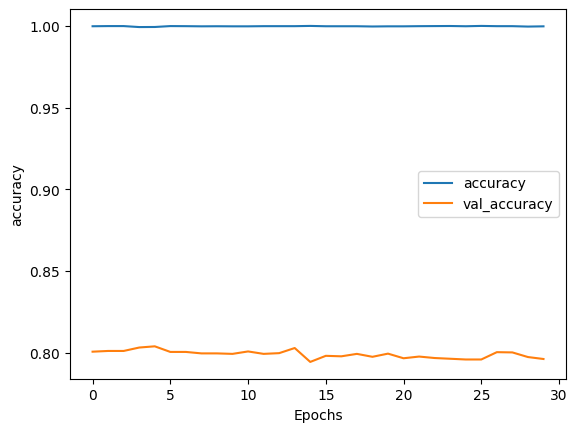

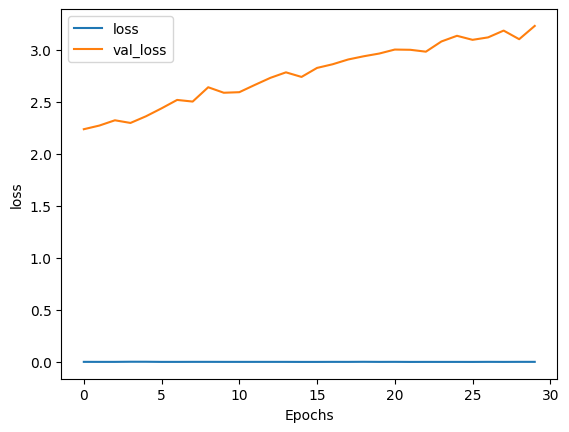

In [19]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(12000, 16)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>